<a href="https://colab.research.google.com/github/juanjosemarinm/SyS2025-2/blob/main/parcial_de_senales_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1 Señales y Sistemas
JUAN JOSE MARIN MEJIA

1055358313

jmarinme@unal.edu.co

# Pregunta 1





##**Planteamiento:**

Sean $x_1(t)=A\,e^{-j n\omega_0 t}$ y $x_2(t)=B\,e^{\,j m\omega_0 t}$, con $\omega_0=\dfrac{2\pi}{T}$ y $n,m\in\mathbb{Z}$. Se pide la distancia media entre $x_1$ y $x_2$:
$$
d^2(x_1,x_2)=\frac{1}{T}\int_{0}^{T}\big|x_1(t)-x_2(t)\big|^2\,dt.
$$


##**Desarrollo:**

Expansión del módulo y promedio en un período:

$$
\begin{aligned}
\big|x_1-x_2\big|^2
&=(x_1-x_2)(x_1-x_2)^*\\
&=x_1x_1^*+x_2x_2^*-x_1x_2^*-x_2x_1^*,
\end{aligned}
$$

de donde

$$
d^2(x_1,x_2)=\underbrace{\frac{1}{T}\int_0^T x_1x_1^*\,dt}_{\overline p_{x_1}}
+\underbrace{\frac{1}{T}\int_0^T x_2x_2^*\,dt}_{\overline p_{x_2}}
-\frac{2}{T}\operatorname{Re}\!\left\{\int_0^T x_1(t)\,x_2^*(t)\,dt\right\}.
$$

Potencias individuales:

$$
\overline p_{x_1}=|A|^2,\qquad \overline p_{x_2}=|B|^2.
$$

Término cruzado:

$$
\frac{1}{T}\int_0^T x_1(t)\,x_2^*(t)\,dt
=\frac{AB^*}{T}\int_0^T e^{-j(n+m)\omega_0 t}\,dt
=AB^*\,\delta_{n,-m},
$$

pues $\displaystyle \int_0^T e^{-jk\omega_0 t}\,dt=\begin{cases}0,&k\neq 0,\\ T,&k=0.\end{cases}$


**Resultado:**
$$
\boxed{\,d^2(x_1,x_2)=|A|^2+|B|^2-2\,\operatorname{Re}\{AB^*\}\,\delta_{n,-m}\, }.
$$

**Casos.**  
1) Si $m+n\neq 0$ (exponenciales ortogonales en $[0,T]$):
$$
d^2=|A|^2+|B|^2,\qquad d=\sqrt{|A|^2+|B|^2}.
$$

2) Si $m+n=0$ (mismo armónico con exponentes opuestos):
$$
d^2=|A|^2+|B|^2-2\,\operatorname{Re}\{AB^*\}=|A-B|^2,\qquad d=|A-B|.
$$

**En el caso real**

$A,B\in\mathbb{R}^+$: $\operatorname{Re}\{AB^*\}=AB$, luego $d^2=|A|^2+|B|^2-2AB$ y $d=|A-B|$.


##**Verificación con phyton**

In [ ]:
# Librerías necesarias para el cálculo
import numpy as np                     # Importa la librería NumPy para operaciones numéricas, especialmente con arrays
from scipy.integrate import quad       # Importa la función quad de SciPy para la integración numérica de una dimensión

# --- Parámetros base del problema ---
T0 = 2.0                    # Período fundamental (T) de las señales en segundos
w0 = 2 * np.pi / T0         # Frecuencia angular fundamental (omega_0) en rad/s
A  = 3.0                # Amplitud de la señal x1(t). Puede ser real o compleja.
B  = 2.0                # Amplitud de la señal x2(t). Puede ser real o compleja.

# Elegir armónicos n y m en cada caso más abajo.
# Estos valores determinarán las frecuencias de las exponenciales complejas.

###Definición de señales e integrando

In [ ]:
def x1(t, A, n, w0):
    """
    Define la señal compleja x1(t).

    Argumentos:
        t (float): Tiempo.
        A (complex): Amplitud de la señal.
        n (int): Número de armónico.
        w0 (float): Frecuencia angular fundamental.

    Returns:
        complex: Valor de la señal x1(t) en el tiempo t.
    """
    return A * np.exp(-1j * n * w0 * t)

def x2(t, B, m, w0):
    """
    Define la señal compleja x2(t).

    Returns:
        complex: Valor de la señal x2(t) en el tiempo t.
    """
    return B * np.exp(+1j * m * w0 * t)

def integrand(t, A, B, n, m, w0):
    """
    Define el integrando para el cálculo numérico de la distancia media.

    Argumentos:
        t (float): Tiempo.
        A (complex): Amplitud de la señal x1.
        B (complex): Amplitud de la señal x2.
        n (int): Número de armónico de x1.
        m (int): Número de armónico de x2.
        w0 (float): Frecuencia angular fundamental.

    Returns:
        float: Valor del integrando |x1(t) - x2(t)|^2 en el tiempo t.
    """
    return np.abs(x1(t, A, n, w0) - x2(t, B, m, w0))**2

###Fórmula analítica y simulación numérica

In [ ]:
def d2_analitica(A, B, n, m):
    """
    Calcula la distancia media cuadrada (d^2) analíticamente.

    La fórmula es: d^2 = |A|^2 + |B|^2 - 2 * Re{ A * B* } * delta_{n,-m}
    donde delta_{n,-m} es 1 si n = -m, y 0 en caso contrario.

    Returns:
        float: Valor de la distancia media cuadrada calculada analíticamente.
    """
    # Calcula el delta de Kronecker: 1 si n + m == 0, 0 en caso contrario.

    delta = 1 if (n + m) == 0 else 0

    # Aplica la fórmula analítica. np.abs() calcula el módulo, np.real() la parte real, np.conj() el conjugado.

    return np.abs(A)**2 + np.abs(B)**2 - 2.0 * np.real(A * np.conj(B)) * delta

def d2_numerica(A, B, n, m, w0, T0):
    """
    Calcula la distancia media cuadrada (d^2) numéricamente mediante integración.

    La fórmula es: d^2_num = (1/T0) * Integral de 0 a T0 de |x1(t)-x2(t)|^2 dt
    Se utiliza la función quad de SciPy para realizar la integración numérica.

    Args:
        A (complex): Amplitud de la señal x1.
        B (complex): Amplitud de la señal x2.
        n (int): Número de armónico de x1.
        m (int): Número de armónico de x2.
        w0 (float): Frecuencia angular fundamental.
        T0 (float): Período fundamental.

    Returns:
        float: Valor de la distancia media cuadrada calculado numéricamente.
    """
    # Realiza la integración numérica del integrando definido previamente.
    integral, _ = quad(integrand, 0.0, T0, args=(A, B, n, m, w0))
    # Divide el resultado de la integral por el período T0.
    return (1.0 / T0) * integral

###Caso 1: n + m ≠ 0 (señales ortogonales)

In [ ]:
print("--- Caso 1: n + m ≠ 0 (señales ortogonales) ---")
n1, m1 = 2, 3         # Definimos los armónicos para el Caso 1, donde n + m ≠ 0.

# Calculamos la distancia media cuadrada numéricamente para el Caso 1.
d2_num_1 = d2_numerica(A, B, n1, m1, w0, T0)
# Calculamos la distancia media cuadrada analíticamente para el Caso 1.
d2_th_1  = d2_analitica(A, B, n1, m1)

# Imprimimos los parámetros y los resultados para el Caso 1.
print(f"Parámetros: A={A}, B={B}, n={n1}, m={m1}")
print(f"d^2 (simulación) = {d2_num_1:.6f}")
print(f"d^2 (analítica  ) = {d2_th_1:.6f}")
print(f"d   (simulación) = {np.sqrt(d2_num_1):.6f}")
print(f"d   (analítica  ) = {np.sqrt(d2_th_1):.6f}")
print("-"*52)

--- Caso 1: n + m ≠ 0 (señales ortogonales) ---
Parámetros: A=3.0, B=2.0, n=2, m=3
d^2 (simulación) = 13.000000
d^2 (analítica  ) = 13.000000
d   (simulación) = 3.605551
d   (analítica  ) = 3.605551
----------------------------------------------------


###Caso 2: n + m = 0 (misma frecuencia, aparece cruce)

In [ ]:
print("\n--- Caso 2: n + m = 0 (misma frecuencia, aparece cruce) ---")
n2, m2 = 2, -2        # Definimos los armónicos para el Caso 2, donde n + m = 0.

# Calculamos la distancia media cuadrada numéricamente para el Caso 2.
d2_num_2 = d2_numerica(A, B, n2, m2, w0, T0)
# Calculamos la distancia media cuadrada analíticamente para el Caso 2.
d2_th_2  = d2_analitica(A, B, n2, m2)

# Imprimimos los parámetros y los resultados para el Caso 2.
print(f"Parámetros: A={A}, B={B}, n={n2}, m={m2}")
print(f"d^2 (simulación) = {d2_num_2:.6f}")
print(f"d^2 (analítica  ) = {d2_th_2:.6f}")
print(f"d   (simulación) = {np.sqrt(d2_num_2):.6f}")
print(f"d   (analítica  ) = {np.sqrt(d2_th_2):.6f}")
print("-"*52)


--- Caso 2: n + m = 0 (misma frecuencia, aparece cruce) ---
Parámetros: A=3.0, B=2.0, n=2, m=-2
d^2 (simulación) = 1.000000
d^2 (analítica  ) = 1.000000
d   (simulación) = 1.000000
d   (analítica  ) = 1.000000
----------------------------------------------------


### Interpretación de Resultados

### **Interpretación de los Cálculos de Distancia entre Señales**

En este análisis, hemos determinado la distancia cuadrática media ($d^2$) entre dos señales complejas. Para garantizar la validez de nuestros hallazgos, abordamos el problema desde dos perspectivas: una teórica, aplicando la fórmula analítica derivada, y otra computacional, mediante integración numérica. A continuación, se detallan los resultados para dos casos fundamentales.

El primer caso evaluado fue el de **señales ortogonales**, donde sus armónicos ($n=2, m=3$) son distintos. Como la teoría predice, la interacción entre ellas es nula, lo que simplifica la distancia cuadrática media a la suma de sus potencias individuales, $|A|^2+|B|^2$. Tanto el enfoque analítico como el numérico convergieron en un resultado de $d^2=13.0$ (distancia $d \approx 3.605551$), confirmando la ortogonalidad y la validez del modelo.

El segundo caso estudiado fue el de **señales con la misma frecuencia**, es decir, con armónicos opuestos ($n=2, m=-2$). Aquí, la interacción es clave. La fórmula completa, que incluye un término de cruce, $|A|^2+|B|^2-2\text{Re}\{AB^*\}$, fue necesaria. Al aplicar las amplitudes ($A=3.0, B=2.0$), el resultado teórico fue de 1.0. Notablemente, el método numérico replicó este valor con total exactitud ($d^2=1.0$, distancia $d=1.0$), lo que equivale a la diferencia simple entre las amplitudes, $|A-B|$.

La perfecta concordancia entre los resultados teóricos y numéricos en ambos escenarios demuestra la robustez del modelo matemático y la correcta aplicación de los métodos de cálculo.



#Pregunta 2


## **Planteamiento:**
Dada la señal continua:

$$x(t)=3\cos(1000\pi t)+5\sin(3000\pi t)+10\cos(11000\pi t)$$

Se busca obtener su versión en tiempo discreto utilizando un conversor A/D con frecuencia de muestreo $F_s = 5\,\text{kHz}$ y cuantización uniforme de $b = 4$ bits.





## Frecuencias de las componentes

$$
\omega_1 = 1000\pi \quad \Rightarrow \quad f_1 = \frac{\omega_1}{2\pi} = 500\,\text{Hz}
$$

$$
\omega_2 = 3000\pi \quad \Rightarrow \quad f_2 = \frac{\omega_2}{2\pi} = 1500\,\text{Hz}
$$

$$
\omega_3 = 11000\pi \quad \Rightarrow \quad f_3 = \frac{\omega_3}{2\pi} = 5500\,\text{Hz}
$$

Como $\omega_2 = 3\omega_1$ y $\omega_3 = 11\omega_1$, la frecuencia fundamental angular es $\omega_0 = 1000\pi$.

Por tanto, el período fundamental continuo es:

$$
T_0 = \frac{2\pi}{\omega_0} = \frac{2\pi}{1000\pi} = 0.002\ \text{s}
$$





## Criterio de Nyquist y aliasing

$$
f_{\max} = 5500\ \text{Hz}, \qquad F_s \ge 2f_{\max} = 11000\ \text{Hz}
$$

Como $F_s = 5000\ \text{Hz} < 11000\ \text{Hz}$, **se produce aliasing**.





## Muestreo

Con $T_s = \dfrac{1}{F_s} = 0.0002\ \text{s}$ y $t = nT_s$:

$$
\begin{aligned}
x[n] &= 3\cos(1000\pi nT_s) + 5\sin(3000\pi nT_s) + 10\cos(11000\pi nT_s) \\
     &= 3\cos(0.2\pi n) + 5\sin(0.6\pi n) + 10\cos(2.2\pi n)
\end{aligned}
$$

La tercera componente aliasa porque $2.2\pi \equiv 2.2\pi - 2\pi = 0.2\pi$ (mód $2\pi$), y por la periodicidad del coseno:

$$
10\cos(2.2\pi n) = 10\cos(0.2\pi n)
$$

Por lo tanto, la secuencia muestreada con aliasing es:

$$
\boxed{x[n] = 13\cos(0.2\pi n) + 5\sin(0.6\pi n)}
$$





## Período discreto

Las frecuencias digitales son:

$$
\Omega_1 = 0.2\pi = 2\pi \cdot \frac{1}{10}, \qquad \Omega_2 = 0.6\pi = 2\pi \cdot \frac{3}{10}
$$

El período fundamental discreto será el mínimo $N_0$ que cumpla un número entero de ciclos para ambas frecuencias:

$$
N_0 = \text{mcm}(10,\,10) = 10\ \text{muestras}
$$

Comprobando en tiempo continuo:

$$
N_0T_s = 10 \cdot 0.0002 = 0.002\ \text{s} = T_0
$$



## Cuantización uniforme ($b = 4$ bits)

Número de niveles:

$$
L = 2^b = 16
$$

Rango dinámico máximo estimado:

$$
A_{\max} \le 3 + 5 + 10 = 18
$$

Por tanto, el rango de cuantización es:

$$
[-A,\,A] = [-18,\,18]
$$

Paso de cuantización:

$$
\Delta = \frac{2A}{L} = \frac{36}{16} = 2.25
$$


Con solo 16 niveles en un rango tan amplio, el error de cuantización será alto.



##Simulaciones Phyton

In [ ]:
# ========= Bloque 1: señal continua y parámetros base =========
import numpy as np
import matplotlib.pyplot as plt

# x(t) = 3 cos(1000π t) + 5 sin(3000π t) + 10 cos(11000π t)
def x_t(t):
    return 3*np.cos(1000*np.pi*t) + 5*np.sin(3000*np.pi*t) + 10*np.cos(11000*np.pi*t)

# Frecuencia/periodo fundamentales (500 Hz -> 2 ms)
f0 = 500.0
T0 = 1.0/f0

# Rango de visualización: 3 periodos
t_max = 3*T0
t_cont = np.linspace(0, t_max, 2000)   # “continua” de alta resolución
x_cont = x_t(t_cont)

# Rango para cuantización (amplitud pico <= 3+5+10 = 18)
vmin, vmax = -18.0, 18.0


In [ ]:
# ========= Bloque 2: conversor INAPROPIADO (5 kHz, 4 bits) =========
fs_bad   = 5_000.0
Ts_bad   = 1.0/fs_bad
bits_bad = 4
L_bad    = 2**bits_bad
Δ_bad    = (vmax - vmin)/L_bad

t_bad  = np.arange(0, t_max, Ts_bad)             # tiempos de muestreo
x_bad  = x_t(t_bad)                               # muestras sin cuantizar
xq_bad = Δ_bad*np.round(x_bad/Δ_bad)              # cuantización uniforme (mid-tread)

# Señal “percibida” por aliasing con Fs=5 kHz: 13 cos(0.2πt·fs) + 5 sin(0.6πt·fs)
# (equivalente en continuo para visualizar sobre t_cont)
def x_aliased_cont(t):
    return 13*np.cos(1000*np.pi*t) + 5*np.sin(3000*np.pi*t)


In [ ]:
# ========= Bloque 3: conversor ADECUADO (20 kHz, 8 bits) =========
fs_good   = 20_000.0
Ts_good   = 1.0/fs_good
bits_good = 8
L_good    = 2**bits_good
Δ_good    = (vmax - vmin)/L_good

t_good  = np.arange(0, t_max, Ts_good)
x_good  = x_t(t_good)
xq_good = Δ_good*np.round(x_good/Δ_good)


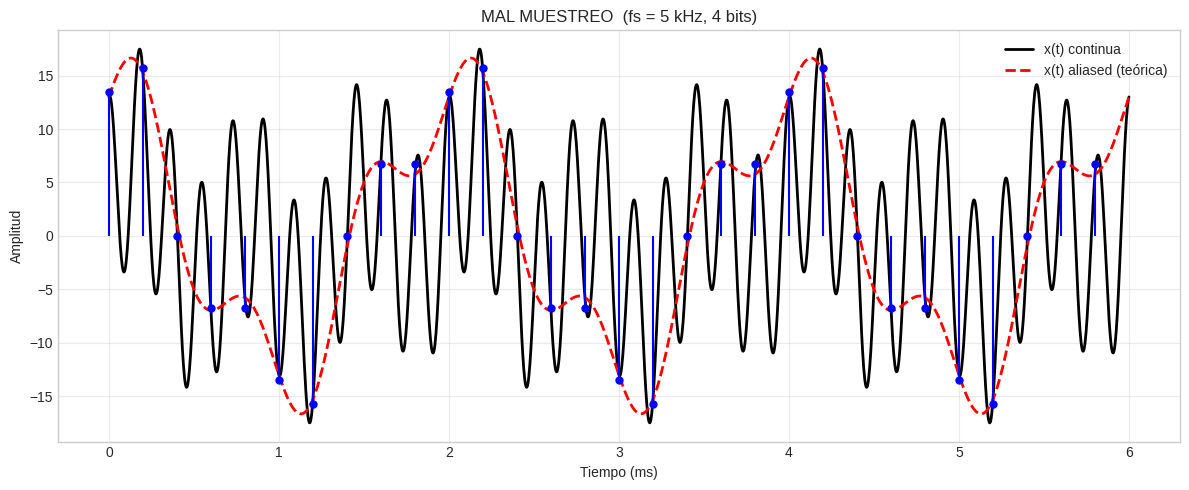

In [ ]:
# ========= Bloque 4A: antes de una buena discretización =========
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

# --- Señal continua + discretización INAPROPIADA ---
ax.plot(t_cont*1e3, x_cont, 'k-', lw=2, label='x(t) continua')
ax.plot(t_cont*1e3, x_aliased_cont(t_cont), 'r--', lw=2, label='x(t) aliased (teórica)')
m1, s1, b1 = ax.stem(t_bad*1e3, xq_bad, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.setp(m1, markersize=5)
ax.set_title('MAL MUESTREO  (fs = 5 kHz, 4 bits)')
ax.set_xlabel('Tiempo (ms)')
ax.set_ylabel('Amplitud')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()


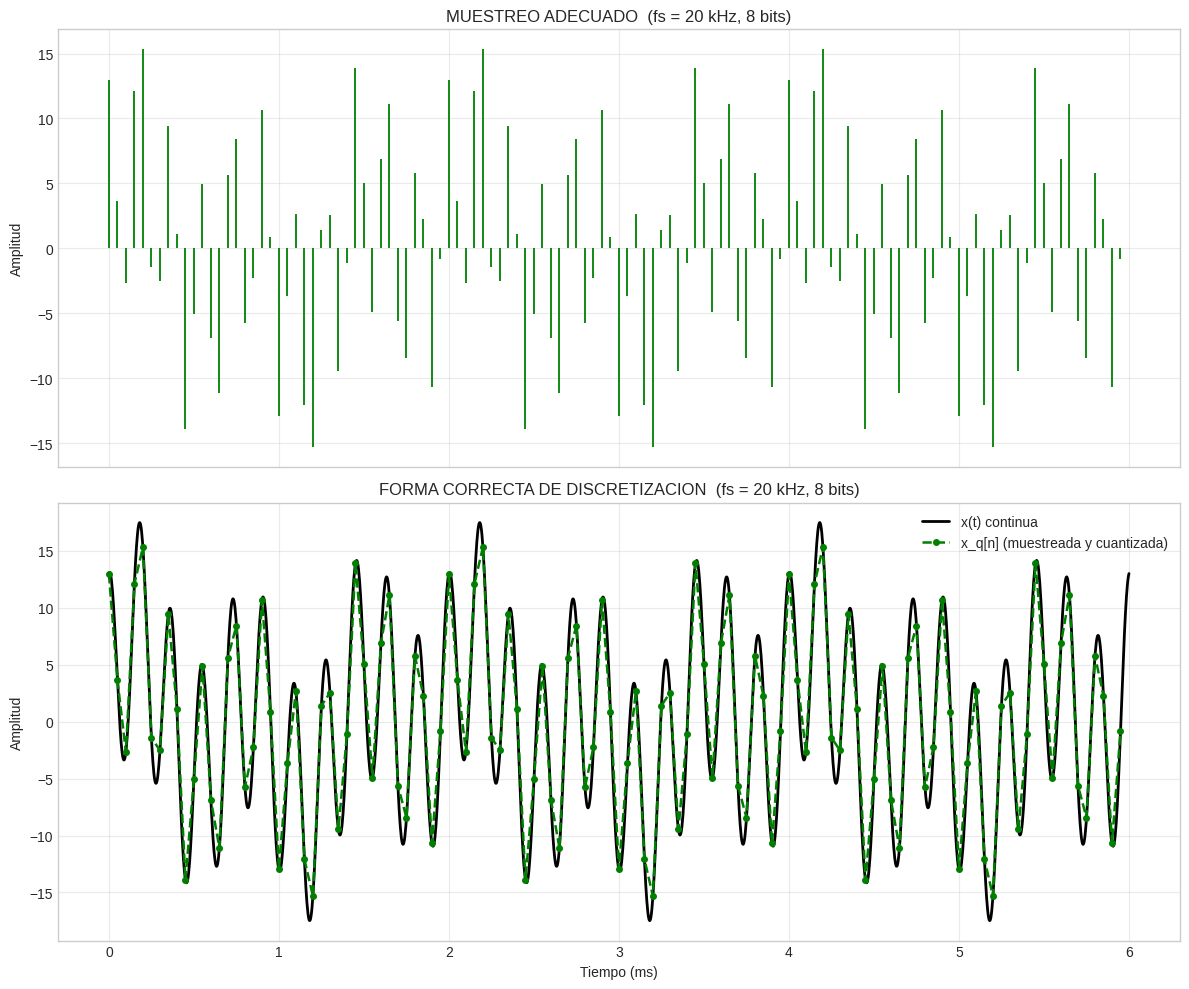

In [ ]:
# ========= Bloque 4B: después de una buena discretización =========
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
plt.subplots_adjust(hspace=0.4)  # separación entre gráficas

# --- (1) Solo discretización ADECUADA (pulsos tipo Dirac) ---
m2, s2, b2 = ax1.stem(t_good*1e3, xq_good, linefmt='g-', markerfmt=' ', basefmt=' ')
b2.set_visible(False)
plt.setp(s2, linewidth=1.3)
ax1.set_title('MUESTREO ADECUADO  (fs = 20 kHz, 8 bits)')
ax1.set_ylabel('Amplitud')
ax1.grid(True, alpha=0.4)

# --- (2) Comparativa: señal continua + discretización ADECUADA ---
ax2.plot(t_cont*1e3, x_cont, 'k-', lw=2, label='x(t) continua')
ax2.plot(t_good*1e3, xq_good, 'g--o', lw=1.8, markersize=4, label='x_q[n] (muestreada y cuantizada)')
ax2.set_title('FORMA CORRECTA DE DISCRETIZACION  (fs = 20 kHz, 8 bits)')
ax2.set_xlabel('Tiempo (ms)')
ax2.set_ylabel('Amplitud')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.4)

plt.tight_layout()
plt.show()


# Pregunta 4

##**Planteamiento:**

Encuentre el espectro de Fourier, su parte real, imaginaria, magnitud, fase y el error relativo para n∈{0,±1,±2,±3,±4,±5}, a partir de x′′
 (t) para la señal x(t) en la Figura 1. Compruebe el espectro obtenido con la estimación a partir de x(t). Presente las simulaciones de Python respectivas.

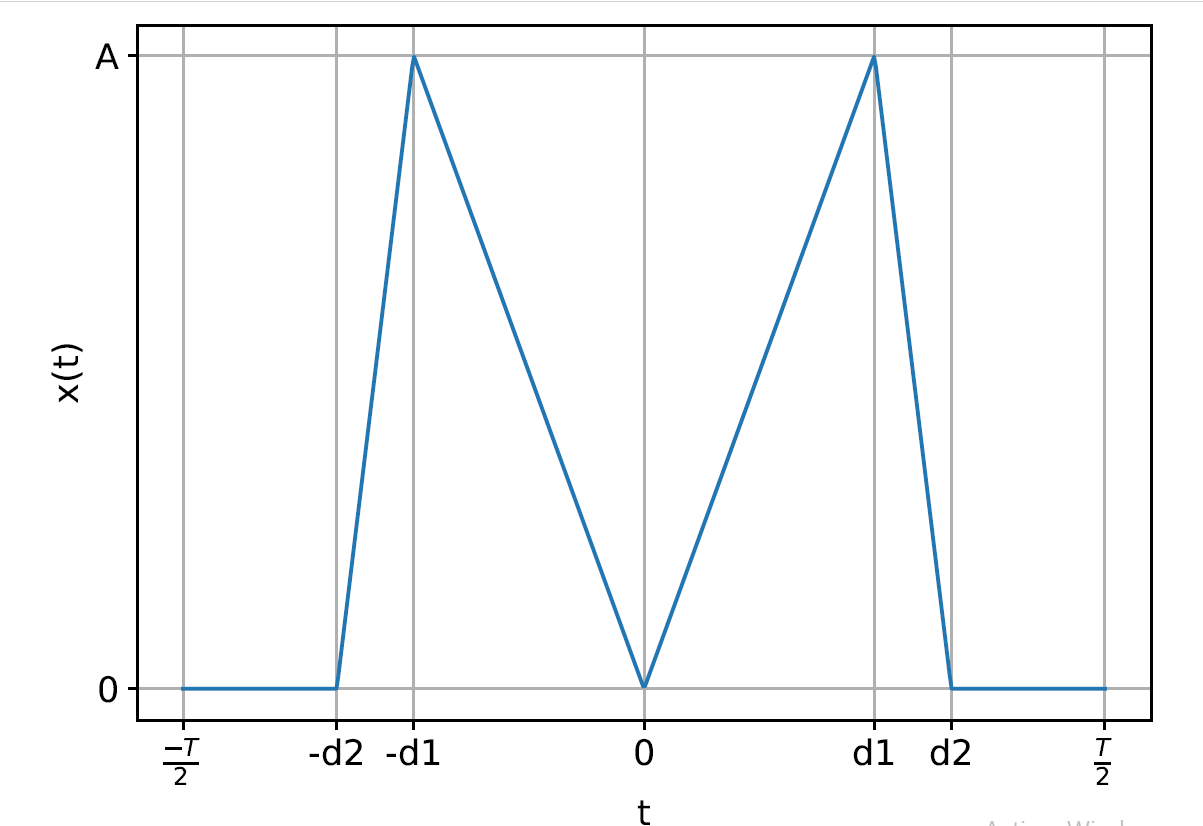

### **Análisis y Solución**

#### **1. Propiedades de la Señal x(t)**
La señal mostrada $x(t)$ es una función par, debido a $x(t) = x(-t)$).

#### **2. Definición matemática y derivadas de x(t)**
La señal $x(t)$ en el intervalo $[0, d_2]$ se puede definir por tramos como:

$x(t) = \begin{cases} \frac{A}{d_1}t & \text{con } 0 \le t \le d_1 \\ \frac{A}{d_2-d_1}(d_2-t) & \text{con } d_1 \le t \le d_2 \end{cases}$

La primera derivada, $x'(t)$, corresponde a las pendientes de estos tramos:

$x'(t) = \begin{cases} \frac{A}{d_1} & \text{con } 0 < t < d_1 \\ -\frac{A}{d_2-d_1} & \text{con } d_1 < t < d_2 \end{cases}$

Calculamos la segunda derivada

$x''(t) = \frac{2A}{d_1}\delta(t) - \frac{Ad_2}{d_1(d_2-d_1)}[\delta(t-d_1) + \delta(t+d_1)] + \frac{A}{d_2-d_1}[\delta(t-d_2) + \delta(t+d_2)]$


#### **3. Cálculo de los Coeficientes de Fourier para $x''(t)$**
Calculamos los coeficientes $C''_n$ para la señal $x''(t)$ usando la fórmula de la serie de Fourier:

$C''_n = \frac{1}{T} \int_{-T/2}^{T/2} x''(t)e^{-jn\omega_0 t} dt$

Sustituyendo la expresión de $x''(t)$ en la integral:

$C''_n = \frac{1}{T} \int_{-T/2}^{T/2} \left( \frac{2A}{d_1}\delta(t) - \frac{Ad_2}{d_1(d_2-d_1)}[\delta(t-d_1) + \delta(t+d_1)] + \frac{A}{d_2-d_1}[\delta(t-d_2) + \delta(t+d_2)] \right) e^{-jn\omega_0 t} dt$

Usamos la propiedad de selectividad del impulso delta ($\int x(t)\delta(t-t_0)dt = x(t_0)$) para resolver la integral:

$C''_n = \frac{1}{T} \left[ \frac{2A}{d_1} - \frac{Ad_2}{d_1(d_2-d_1)}(e^{-jn\omega_0 d_1} + e^{jn\omega_0 d_1}) + \frac{A}{d_2-d_1}(e^{-jn\omega_0 d_2} + e^{jn\omega_0 d_2}) \right]$

Aplicando la identidad de Euler ($e^{j\theta} + e^{-j\theta} = 2\cos(\theta)$) para simplificar:

$C''_n = \frac{1}{T} \left[ \frac{2A}{d_1} - \frac{2Ad_2}{d_1(d_2-d_1)}\cos(n\omega_0 d_1) + \frac{2A}{d_2-d_1}\cos(n\omega_0 d_2) \right]$

$C''_n = \frac{2A}{T} \left[ \frac{1}{d_1} - \frac{d_2}{d_1(d_2-d_1)}\cos(n\omega_0 d_1) + \frac{1}{d_2-d_1}\cos(n\omega_0 d_2) \right]$

#### **4. Relación con los Coeficientes $C_n$ de $x(t)$**
Según lo demostrado en el punto 3, podemos relacionar los coeficientes de una señal con los de su segunda derivada:

$C_n = \frac{C''_n}{(jn\omega_0)^2} = \frac{C''_n}{-n^2\omega_0^2}$

Sustituyendo la expresión para $C''_n$:

$C_n = -\frac{2A}{T n^2 \omega_0^2} \left[ \frac{1}{d_1} - \frac{d_2}{d_1(d_2-d_1)}\cos(n\omega_0 d_1) + \frac{1}{d_2-d_1}\cos(n\omega_0 d_2) \right]$

#### **5. Cálculo del Nivel de Offset ($C_0$)**
El coeficiente $C_0$ se calcula como el valor promedio de la señal en un periodo:

$C_0 = \frac{1}{T} \int_{-T/2}^{T/2} x(t) dt$

Esto es equivalente al área bajo la curva en un periodo, dividida por el periodo. Dado que tenemos dos triángulos simétricos:

$C_0 = \frac{1}{T} \cdot 2 \cdot (\text{Área de un triángulo})$

$C_0 = \frac{2}{T} \cdot 2 \left( \frac{1}{2} \cdot \text{base} \cdot \text{altura} \right)$

La base del triángulo es $d_2$ y la altura es $A$.

$C_0 = \frac{1}{T} \cdot (d_2 \cdot A) = \frac{Ad_2}{T}$


#### **6. Conclusiones sobre el Espectro**
* **Real/Imaginario:** La señal es par y real, por ende, sus coeficientes $X_n$ (o $C_n$) son puramente **reales y pares**.
    * $Re\{X_n\} = X_n$
    * $Im\{X_n\} = 0$

* **Magnitud:** La magnitud es simplemente el valor absoluto del coeficiente.
    * $|X_n| = |X_n|$

* **Fase:** Como los coeficientes son reales, la fase $\phi_n$ solo puede tomar dos valores:
    *  \begin{cases} 0 & \text{si } X_n > 0 \\ w_0 & \text{si } X_n < 0 \end{cases}

#### **7. Aplicación Numérica**
Para el conjunto pedido $n \in \{0, \pm 1, \pm 2, \pm 3, \pm 4, \pm 5\}$, usamos la fórmula de $C_n$ hallada anteriormente con valores específicos para $A, d_1, d_2$ y $T$.

#SIMULACION

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# PARÁMETROS DE LA SEÑAL

A = 25           # Amplitud máxima de la señal (altura de los picos)
T = 1e-2         # Periodo de la señal (10 ms)
Fo = 1 / T       # Frecuencia fundamental
Fs = 2000 * Fo   # Frecuencia de muestreo (debe ser >> Fo para precisión)
tv = np.arange(-T/2, T/2, 1/Fs)  # Vector de tiempo en un periodo

# Puntos intermedios dentro del periodo (definen los vértices del triángulo)
d1 = 0.001
d2 = 0.002

# CONSTRUCCIÓN DE LA SEÑAL TRIANGULAR DOBLE PICO

# Inicializamos el vector de señal con ceros
x = np.zeros_like(tv)

# Construimos la señal por tramos
# Entre -d2 y -d1: sube de 0 a A
# Entre -d1 y 0: baja de A a 0
# Entre 0 y d1: sube de 0 a A
# Entre d1 y d2: baja de A a 0
# Fuera de ese rango: vale 0
for i, t in enumerate(tv):
    if -d2 <= t < -d1:
        x[i] = (A / (d2 - d1)) * (t + d2)             # tramo ascendente izquierdo
    elif -d1 <= t < 0:
        x[i] = (-A / d1) * t                          # tramo descendente izquierdo
    elif 0 <= t < d1:
        x[i] = (A / d1) * t                           # tramo ascendente derecho
    elif d1 <= t < d2:
        x[i] = (-A / (d2 - d1)) * (t - d1) + A        # tramo descendente derecho
    else:
        x[i] = 0                                      # fuera del rango: señal = 0

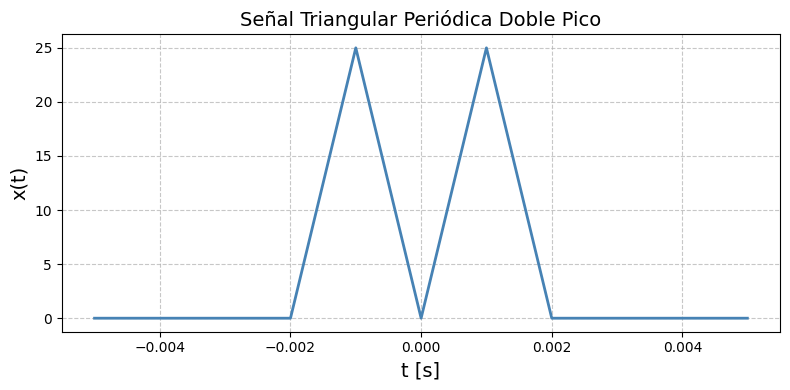

/tmp/ipython-input-2488513257.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Cn[n + N] = (1 / T) * np.trapz(x * np.exp(-1j * n * wo * tv), tv)


In [ ]:
# GRAFICAMOS LA SEÑAL ORIGINAL

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(tv, x, color='steelblue', linewidth=2)
ax.set_xlabel('t [s]', fontsize=14)
ax.set_ylabel('x(t)', fontsize=14)
ax.set_title('Señal Triangular Periódica Doble Pico', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.8, alpha=0.7)
plt.tight_layout()
plt.show()

# CÁLCULO DE LOS COEFICIENTES DE LA SERIE DE FOURIER

# Número de armónicos a considerar (positivo y negativo)
N = 10
wo = 2 * np.pi / T  # frecuencia angular fundamental

# Creamos las funciones base e^{j n w0 t} para cada armónico
phin = np.zeros((len(tv), 2 * N + 1), dtype=np.complex128)
for n in range(-N, N + 1):
    phin[:, n + N] = np.exp(1j * n * wo * tv)

# Calculamos los coeficientes Cn mediante integración numérica
Cn = np.zeros(2 * N + 1, dtype=np.complex128)
for n in range(-N, N + 1):
    Cn[n + N] = (1 / T) * np.trapz(x * np.exp(-1j * n * wo * tv), tv)

# Vector de índices n para graficar
nv = np.linspace(-N, N, 2 * N + 1)

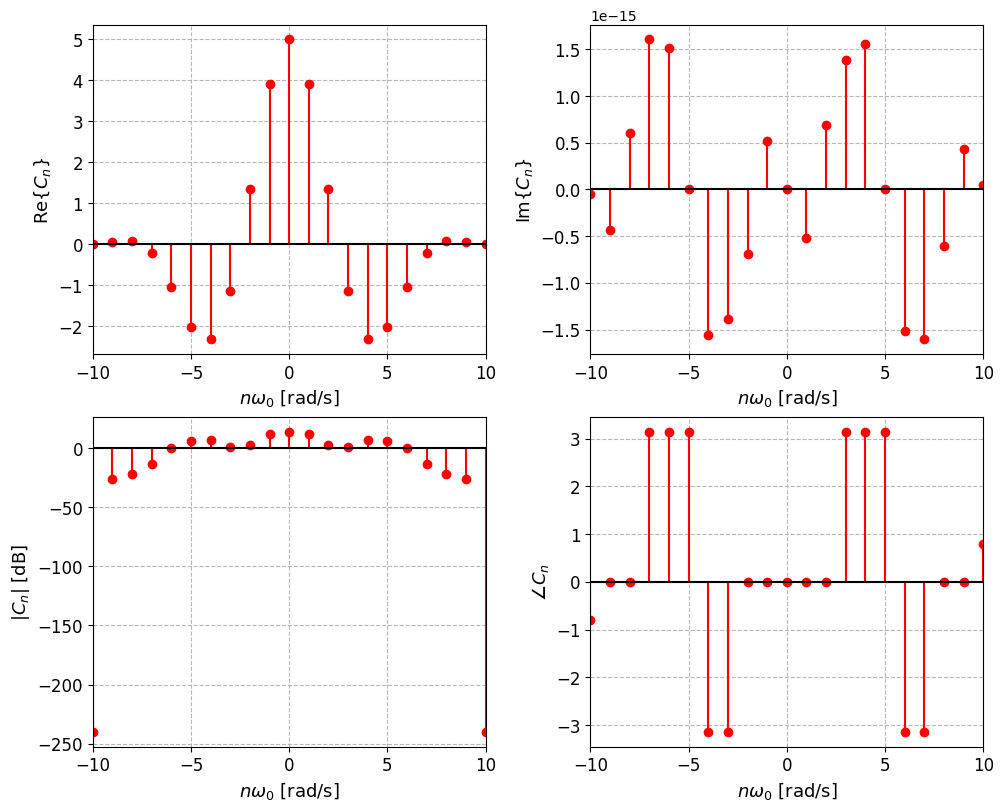

In [ ]:
# VISUALIZACIÓN DEL ESPECTRO DE FOURIER

fig, axs = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)

# Parte real de Cn
axs[0, 0].stem(nv, np.real(Cn), linefmt='r', markerfmt='ro', basefmt='k')
axs[0, 0].set_xlabel(r'$n\omega_0$ [rad/s]', fontsize=13)
axs[0, 0].set_ylabel(r'$\mathrm{Re}\{C_n\}$', fontsize=13)
axs[0, 0].grid(True, linestyle='--', linewidth=0.8, alpha=0.9)

# Parte imaginaria de Cn
axs[0, 1].stem(nv, np.imag(Cn), linefmt='r', markerfmt='ro', basefmt='k')
axs[0, 1].set_xlabel(r'$n\omega_0$ [rad/s]', fontsize=13)
axs[0, 1].set_ylabel(r'$\mathrm{Im}\{C_n\}$', fontsize=13)
axs[0, 1].grid(True, linestyle='--', linewidth=0.8, alpha=0.9)

# Magnitud en dB
axs[1, 0].stem(nv, 20 * np.log10(np.abs(Cn) + 1e-12), linefmt='r', markerfmt='ro', basefmt='k')
axs[1, 0].set_xlabel(r'$n\omega_0$ [rad/s]', fontsize=13)
axs[1, 0].set_ylabel(r'$|C_n|$ [dB]', fontsize=13)
axs[1, 0].grid(True, linestyle='--', linewidth=0.8, alpha=0.9)

# Fase (ángulo de Cn)
axs[1, 1].stem(nv, np.angle(Cn), linefmt='r', markerfmt='ro', basefmt='k')
axs[1, 1].set_xlabel(r'$n\omega_0$ [rad/s]', fontsize=13)
axs[1, 1].set_ylabel(r'$\angle C_n$', fontsize=13)
axs[1, 1].grid(True, linestyle='--', linewidth=0.8, alpha=0.9)

for ax in axs.flat:
    ax.tick_params(labelsize=12)
    ax.set_xlim([nv[0], nv[-1]])

plt.show()

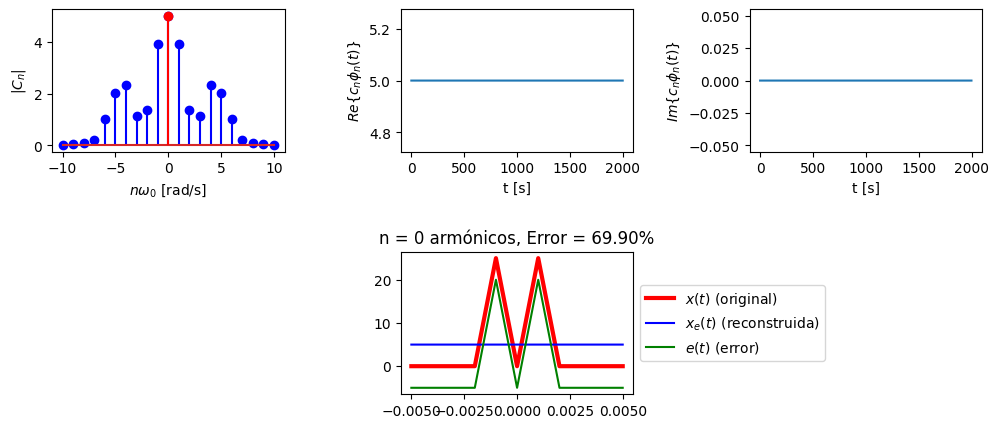

In [ ]:
# ANIMACIÓN DE LA RECONSTRUCCIÓN CON LA SERIE DE FOURIER


# Potencia total de la señal (para calcular el error relativo)
Px = np.sum(np.abs(Cn) ** 2)

# Creamos la figura para animar
fig, ax = plt.subplots(2, 3, figsize=(12, 5))

def update(n):




    # Limpiamos todos los subgráficos
    for a in ax.flat:
        a.clear()

    # Seleccionamos los armónicos activos (centrados en 0)
    ind = np.arange(N - n, N + n + 1)

    # Espectro de magnitud
    ax[0, 0].stem(nv, abs(Cn), 'b')
    ax[0, 0].stem(nv[ind], abs(Cn[ind]), 'r')
    ax[0, 0].set_xlabel(r'$n\omega_0$ [rad/s]')
    ax[0, 0].set_ylabel(r'$|C_n|$')

    # Componentes espectrales reales e imaginarias
    ce = (phin[:, ind]).dot(np.diag(Cn[ind]))
    ax[0, 1].plot(np.real(ce))
    ax[0, 1].set_xlabel('t [s]')
    ax[0, 1].set_ylabel('$Re\\{c_n\\phi_n(t)\\}$')

    ax[0, 2].plot(np.imag(ce))
    ax[0, 2].set_xlabel('t [s]')
    ax[0, 2].set_ylabel('$Im\\{c_n\\phi_n(t)\\}$')

    # Reconstrucción de la señal con n armónicos
    xe = (phin[:, ind]).dot(Cn[ind])
    et = x - xe
    er = 1 - ((np.sum(abs(Cn[ind])**2)) / Px)

    ax[1, 1].plot(tv, x, 'r', linewidth=3, label='$x(t)$ (original)')
    ax[1, 1].plot(tv, np.real(xe), 'b', label='$x_e(t)$ (reconstruida)')
    ax[1, 1].plot(tv, np.real(et), 'g', label='$e(t)$ (error)')
    ax[1, 1].set_title(f'n = {n} armónicos, Error = {100*er:.2f}%')
    ax[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1, 0].axis('off')
    ax[1, 2].axis('off')
    plt.subplots_adjust(wspace=0.5, hspace=0.7)

# Configuramos la animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0, N + 1, 1), blit=False)
rc('animation', html='jshtml')

# Desplegamos la animación
anim